### Prediction for readmission
It is important to know if a patient will be readmitted to a hospital. This will help doctors change treatment to avoid readmission

In [1]:
import numpy as np
import pandas as pd

path = './dataset_diabetes/diabetic_data.csv'
diabetes_dataset = pd.read_csv(path, na_values='?') # sets values containg ? as nan

C:\Users\brian\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
print(diabetes_dataset.shape)
diabetes_dataset.head(5)

(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
# Drop columns with nan values
diabetes_dataset = diabetes_dataset.dropna(axis=1, how='any')
# View diabetes dataset
print(diabetes_dataset.shape)
diabetes_dataset.head(5)

(101766, 43)


,encounter_id,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Female,[0-10),6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Female,[10-20),1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Male,[30-40),1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Male,[40-50),1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# Do away with un-informative columns [encounter_id, patient_nbr]
diabetes_dataset = diabetes_dataset.drop(['encounter_id', 'patient_nbr'] , axis=1);

In [5]:
# Refactor the age range to a single integer value. (Making the learning process easier, avoid fitting errors)
diabetes_dataset.loc[diabetes_dataset.age== '[0-10)','age'] = 0;
diabetes_dataset.loc[diabetes_dataset.age== '[10-20)','age'] = 10;
diabetes_dataset.loc[diabetes_dataset.age== '[20-30)','age'] = 20;
diabetes_dataset.loc[diabetes_dataset.age== '[30-40)','age'] = 30;
diabetes_dataset.loc[diabetes_dataset.age== '[40-50)','age'] = 40;
diabetes_dataset.loc[diabetes_dataset.age== '[50-60)','age'] = 50;
diabetes_dataset.loc[diabetes_dataset.age== '[60-70)','age'] = 60;
diabetes_dataset.loc[diabetes_dataset.age== '[70-80)','age'] = 70;
diabetes_dataset.loc[diabetes_dataset.age== '[80-90)','age'] = 80;
diabetes_dataset.loc[diabetes_dataset.age== '[90-100)','age'] = 90;
diabetes_dataset.age = diabetes_dataset.age.astype(np.int32)

diabetes_dataset.loc[diabetes_dataset.max_glu_serum== 'None','max_glu_serum'] = 0;
diabetes_dataset.loc[diabetes_dataset.max_glu_serum== 'Norm','max_glu_serum'] = 100;
diabetes_dataset.loc[diabetes_dataset.max_glu_serum== '>200','max_glu_serum'] = 200;
diabetes_dataset.loc[diabetes_dataset.max_glu_serum== '>300','max_glu_serum'] = 300;
diabetes_dataset.max_glu_serum = diabetes_dataset.max_glu_serum.astype(np.int32)


diabetes_dataset.loc[diabetes_dataset.A1Cresult== 'None','A1Cresult'] = 0;
diabetes_dataset.loc[diabetes_dataset.A1Cresult== 'Norm','A1Cresult'] = 5;
diabetes_dataset.loc[diabetes_dataset.A1Cresult== '>7','A1Cresult'] = 7;
diabetes_dataset.loc[diabetes_dataset.A1Cresult== '>8','A1Cresult'] = 8;
diabetes_dataset.A1Cresult = diabetes_dataset.A1Cresult.astype(np.int32)


diabetes_dataset.loc[diabetes_dataset.change== 'No','change'] = 0;
diabetes_dataset.loc[diabetes_dataset.change== 'Ch','change'] = 1;
diabetes_dataset.change = diabetes_dataset.change.astype(np.int8)



diabetes_dataset.loc[diabetes_dataset.diabetesMed== 'No','diabetesMed'] = 0;
diabetes_dataset.loc[diabetes_dataset.diabetesMed== 'Yes','diabetesMed'] = 1;
diabetes_dataset.diabetesMed = diabetes_dataset.diabetesMed.astype(np.int8)


medications = ["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]

for med in medications:
    diabetes_dataset.loc[diabetes_dataset[med] == 'No', med] = -20;
    diabetes_dataset.loc[diabetes_dataset[med] == 'Down', med] = -10;
    diabetes_dataset.loc[diabetes_dataset[med] == 'Steady', med] = 0;
    diabetes_dataset.loc[diabetes_dataset[med] == 'Up', med] = 10;
    diabetes_dataset[med] = diabetes_dataset[med].astype(np.int32)
    

categoricals = ['gender']



for c in categoricals:
    diabetes_dataset[c] = pd.Categorical(diabetes_dataset[c]).codes

In [6]:
diabetes_dataset.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

### We are predicting readmission

In [7]:
diabetes_dataset.loc[diabetes_dataset.readmitted != 'NO','readmitted'] = 1;
diabetes_dataset.loc[diabetes_dataset.readmitted == 'NO','readmitted'] = 0;

#diabetes_dataset.loc[diabetes_dataset.readmitted != '<30','readmitted'] = 0;
#diabetes_dataset.loc[diabetes_dataset.readmitted == '<30','readmitted'] = 1;
diabetes_dataset.readmitted = diabetes_dataset.readmitted.astype(np.int8)

In [8]:
# Assign X and Y values
y = diabetes_dataset.readmitted
X = diabetes_dataset.drop('readmitted', axis=1)

In [9]:
diabetes_dataset.tail(10)

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101756,0,60,1,1,7,2,46,6,17,1,...,-20,0,-20,-20,-20,-20,-20,0,1,1
101757,0,70,1,1,7,5,21,1,16,0,...,-20,0,-20,-20,-20,-20,-20,0,1,0
101758,0,80,1,1,7,5,76,1,22,0,...,-20,10,-20,-20,-20,-20,-20,1,1,0
101759,1,80,1,1,7,1,1,0,15,3,...,-20,10,-20,-20,-20,-20,-20,1,1,0
101760,0,60,1,1,7,6,45,1,25,3,...,-20,-10,-20,-20,-20,-20,-20,1,1,1
101761,1,70,1,3,7,3,51,0,16,0,...,-20,-10,-20,-20,-20,-20,-20,1,1,1
101762,0,80,1,4,5,5,33,3,18,0,...,-20,0,-20,-20,-20,-20,-20,0,1,0
101763,1,70,1,1,7,1,53,0,9,1,...,-20,-10,-20,-20,-20,-20,-20,1,1,0
101764,0,80,2,3,7,10,45,2,21,0,...,-20,10,-20,-20,-20,-20,-20,1,1,0
101765,1,70,1,1,7,6,13,3,3,0,...,-20,-20,-20,-20,-20,-20,-20,0,0,0


In [10]:
print(X.shape)
print(y.shape)

(101766, 40)
(101766,)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(76324, 40)
(25442, 40)
(76324,)
(25442,)


### Cross validation

In [13]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [14]:
seed = 4
# Evaluation metric
scoring = 'accuracy'

# Models
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SGDC', SGDClassifier()))
models.append(('KNN', KNeighborsClassifier()))
# models.append(('SVM', SVC()))
# Evaluate model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    message = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(message)

C:\Users\brian\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LR: 0.616962 (0.002214)
CART: 0.561606 (0.004514)
SGDC: 0.517635 (0.044167)
KNN: 0.548884 (0.006114)


In [18]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# predict the response values for the observations in X
logreg.predict(X_train)

y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.62176715667
             precision    recall  f1-score   support

          0       0.62      0.80      0.70     13826
          1       0.63      0.41      0.50     11616

avg / total       0.62      0.62      0.61     25442



### Is 62% bad?

#### Not the best, but is above the null accuracy (54.34321).

## Confusion Matrix


This snippet of code was extracted from: 
http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

Confusion matrix, without normalization
[[11081  2745]
 [ 6878  4738]]
Normalized confusion matrix
[[ 0.8   0.2 ]
 [ 0.59  0.41]]


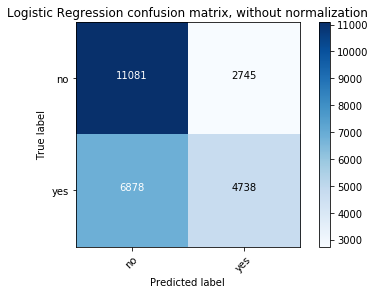

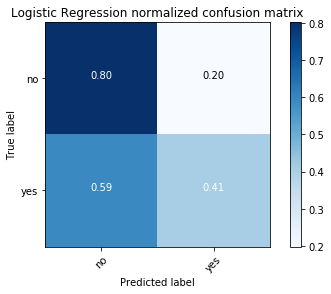

In [17]:
"""
This snippet of code was extracted from: 
http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
"""

print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names = ['no', 'yes']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for all predicted y

predicted_y = [y_pred]

titles = ['Logistic Regression']

for index, y_prediction in enumerate(predicted_y):
    cnf_matrix = confusion_matrix(y_test, y_prediction)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title=titles[index] + ' confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title=titles[index] + ' normalized confusion matrix')

    plt.show()

#### Prediction

In [ ]:
logreg.predict([['col_1', 'col_2', '... col_40']]);

"""
Output

0 or 1

"""